## Final Project Submission

Please fill out:
* Student name: PAUL NGATIA
* Student pace: HYBRID
* Scheduled project review date/time: 
* Instructor name: MWIKALI
* Blog post URL:N/A


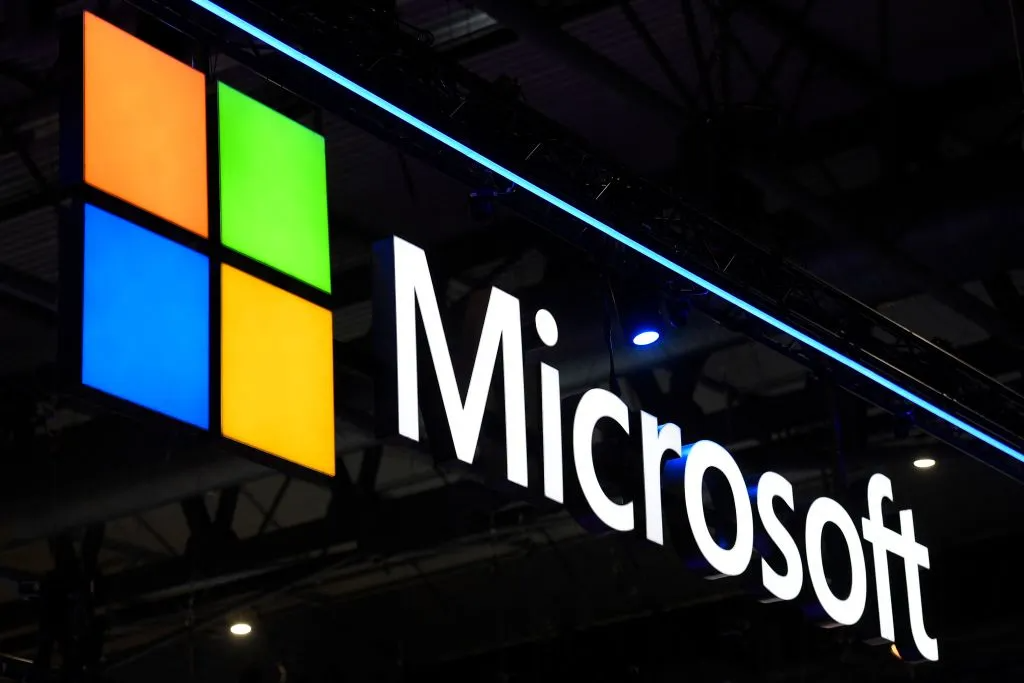

# Microsoft Film Analysis

#  OVERVIEW


Because of the increase in indie film production in large corporations, Microsoft has given us the duty of evaluating the state of the film business before it jumps on the bandwagon. We examined the most popular genres and those with high audience votes in order to draw conclusions. We also utilized the return on investment as a metric to assess the profitability of specific genres. Finally, we preview the month of release of those specific movies.

## 1. BUSINESS UNDERSTANDING

When opting to enter the original video content market, Microsoft may have a business challenge in figuring out how to make material that will differentiate it from rivals and draw in and keep viewers. In order to establish a presence in the market, Microsoft will need to stand out from the competition and produce engaging original content that appeals to viewers. To do this, the company will need to:-
- Make significant investments in content development, talent acquisition, and marketing.
- Acquire a thorough grasp of the trends and preferences of the audience,
- Select a monetization plan that strikes a balance between the expenses of producing content and sources of income like advertising or subscriptions.

My analysis was founded on three main criteria.
1. Which month of the year is best for a movie's release?
2. How do revenues and manufacturing costs relate to one another?
3. Which genres are the most well-liked?



## 2. DATA UNDERSTANDING

Three movie websites—Box Office Mojo, The Numbers, and TMDB—provided the datasets used in this analysis.

- The first dataset, bom.movie_gross.csv, consists of five columns: the release year, domestic and overseas box office receipts, studios, and movie titles. 

- The second dataset, tn.movie_budgets.csv, contains information on released movies, including titles, release dates, and financial details like production budget and global profit, may be found in the second dataset, tn.movie_budgets.csv. The ROI is the dataset's main variable, and the financial data columns were the main factor in the dataset's selection.

- The third dataset, tmdb.movies.csv, contains genre codes, original language for the films, original movie names, popularity metrics, release dates, and vote data are all included in the third dataset, tmdb.movies.csv. I mapped genre codes to genre names using this dataset from the same webpage in order to observe which genres are more popular.

## Load libraries and packages

In [1]:
# importing needed packages
import pandas as pd
#adjusting the pandas presentation to prevent dataframes from including scientific notation
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### First Dataset - Box office mojo

In [2]:
bom_movie_df = pd.read_csv("C:\\Users\\PC\\Documents\\GitHub\\Microsoft Film Analysis\\zippedData\\bom.movie_gross.csv.gz")
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


With 3387 rows and 5 columns, the DataFrame 'bom_movie_df' holds the following movie-related information:

'title': the film's title
'studio': the production company for the film
'domestic_gross': the film's gross income in the United States
'foreign_gross': the film's foreign gross income expressed in US dollars
- 'year': the year of the film's premiere

The output also displays the DataFrame's initial few rows.

In [3]:
# obtaining DataFrame information
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


- Strings or a combination of strings and other data types are contained in the "title," "studio," and "foreign_gross" columns, which have object data types.
- The 'domestic_gross' column contains decimal-formatted numerical data because it has a float64 data type.
- The 'year' column contains integer values because of its int64 data type.
- There are five missing entries in the'studio' column, and there are 28 and 1350 missing data in the 'domestic_gross' and 'foreign_gross' columns, respectively.

In [4]:
# generating descriptive statistics for domestic box office values
bom_movie_df['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

The output displays the summary data from the DataFrame 'bom_movie_df''s 'domestic_gross' column:
- The column's mean is roughly 28.75 million dollars.
- The column's standard deviation, which is roughly 66.98 million USD, shows how dispersed the data is.
- Since the column's minimum value is $100, there are movies in the dataset with extremely low box office receipts.
- There are movies in the dataset that made a lot of money domestically, as seen by the column's maximum value of almost 936.7 million dollars.

In [5]:
# generating descriptive statistics for production budget values
bom_movie_df['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

The output displays the summary statistics from the DataFrame 'bom_movie_df''s 'foreign_gross' column:

- The column has 1350 missing values, as indicated by the count of non-null values (2037).I'll take care of this in the part on data cleaning.
- There are 1204 unique values in the column, according to the unique count of values, which suggests that some films had numerous overseas gross amounts.
- '1200000', the highest amount in the column, appears 23 times, suggesting that 23 different films grossed 1.2 million dollars in international markets.
- The number of times the top value appears in the column is indicated by the frequency (freq).

### Second data set - The numbers movie budgets

In [6]:
# Loading the movie budget dataset
movie_budgets_df = pd.read_csv("C:\\Users\\PC\\Documents\\GitHub\\Microsoft Film Analysis\\zippedData\\tn.movie_budgets.csv.gz")
movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


The movie_budgets_df dataframe has six columns and 5782 rows. A movie is represented by each row, along with details about its gross sales and budget. These are the columns:

- id: a special number assigned to every film
- release_date: the day the film was made available to the public in theaters
- movie: the film's title - production_budget: the film's estimated production budget - domestic_gross: the film's gross receipts from North America's home market
- worldwide_gross: the film's total global income.

In [7]:
# obtaining DataFrame information
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


First, we'll transform and clean the movie_budgets_df dataframe. Using the str.replace() function, we can get rid of the dollar signs and commas from the production_budget, domestic_gross, and worldwide_gross columns. Additionally, we'll change these object-based columns to numeric data types.

In [8]:
# generating a brief description for DataFrame
movie_budgets_df.describe()

,id
count,5782.00
mean,50.37
std,28.82
min,1.00
25%,25.00
50%,50.00
75%,75.00
max,100.00


### Third Data Set - Tmdb

In [9]:
# loading tmdb dataset
tmdb_movies = pd.read_csv("C:\\Users\\PC\\Documents\\GitHub\\Microsoft Film Analysis\\zippedData\\tmdb.movies.csv.gz",index_col=0)
tmdb_movies 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


There are nine columns and 26,518 rows in the tmdb_movies dataframe. The genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, and vote_count are the columns that make up the dataset.

The following is a synopsis of the columns:

- genre_ids: an integer list that indicates the movie's genre
- id: the film's unique identifier
- original_language: the film's original tongue
original_title: the film's original title
- popularity: a gauge of the film's level of appeal
- title: the film's title - release_date: the day the film was released
- vote_average: the film's average rating
- vote_count: the total number of ballots submitted for the film.

In [10]:
# obtaining data info
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


No values in the dataset are missing.

In [11]:
#arranging in ascending order according to the "popularity" column
tmdb_movies.sort_values(by=["popularity"], ascending=True).head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
13258,[99],403294,en,9/11: Simulations,0.60,2014-07-04,9/11: Simulations,10.00,1
11010,[],203325,en,Slaves Body,0.60,2013-06-25,Slaves Body,0.50,1
11011,[99],186242,en,Re-Emerging: The Jews of Nigeria,0.60,2013-05-17,Re-Emerging: The Jews of Nigeria,0.50,2
11012,[99],116868,en,Occupation: Fighter,0.60,2013-08-02,Occupation: Fighter,0.50,2
11013,[99],85337,en,Wonders Are Many: The Making of Doctor Atomic,0.60,2013-08-07,Wonders Are Many: The Making of Doctor Atomic,0.50,2


With popularity as low as 0.6 and vote counts as low as 1, it appears that some of these films may not have been well-known or popular; this is shown by the low popularity values.

In [12]:
tmdb_movies.vote_count.mean()

194.22483689708488

In the tmdb_movies dataset, the average number of votes for movies is roughly 194.2. The mean is relatively low.

In [13]:
tmdb_movies.nlargest(5, 'vote_count') 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
17383,"[28, 12, 35]",293660,en,Deadpool,35.07,2016-02-12,Deadpool,7.60,20175
5179,"[878, 28, 12]",24428,en,The Avengers,50.29,2012-05-04,The Avengers,7.60,19673
6,"[28, 12, 14, 878]",19995,en,Avatar,26.53,2009-12-18,Avatar,7.40,18676
11032,"[12, 18, 878]",157336,en,Interstellar,28.44,2014-11-05,Interstellar,8.20,18597


The top five rows of the Dataset tmdb_movies will be returned by this code, arranged in descending order according to the 'vote_count' column. I used the nlargest() method. to return the largest values from the set.

The highest vote_count is 22186 for the Inception movie.

## Data Preparation

My data was loaded and operational now, so it was time to clean it up and get it ready for analysis.

### Box office mojo

In [14]:
 #convert 'foreign gross' column to a float 
bom_movie_df['foreign_gross'] = pd.to_numeric(bom_movie_df['foreign_gross'], errors='coerce')


The 'foreign_gross' column will become a float thanks to that code. The values in the column are converted to the numeric data type (float) using the pd.to_numeric() method. The errors='coerce' argument indicates that if any value cannot be converted, it will be set to NaN (Not a Number).

In [15]:
#creating new descriptive statistics for values of the production budget
bom_movie_df['foreign_gross'].describe()

count        2032.00
mean     75057041.63
std     137529351.20
min           600.00
25%       3775000.00
50%      18900000.00
75%      75050000.00
max     960500000.00
Name: foreign_gross, dtype: float64

The output displays the summary statistics from the DataFrame 'bom_movie_df''s 'foreign_gross' column:
- mean: the column's mean, or average, value, which is roughly 75 million.
- std: The values in the column's standard deviation, or roughly 137 million.
- min: the 600 dollar value, the smallest value in the column. 
- max: the maximum value, around 961 million, in the column.

In [16]:
#checking the bom_movie_df for missing values
bom_movie_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

Missing values can be found in the studio, domestic gross, and foreign gross columns of the bom_movie_df dataframe. In particular, the domestic gross column has 28 missing data, the overseas gross column has 1355 missing values, and the studio column has 5 missing values.

In [17]:
#examining the foreign_gross column's percentage of missing values 
missing_percent = (bom_movie_df["foreign_gross"].isnull().mean()) * 100
print("Percentage of missing values in 'foreign_gross' column of bom_movie_df: {:.2f}%".format(missing_percent)) 

Percentage of missing values in 'foreign_gross' column of bom_movie_df: 40.01%


A large number of values is missing from the 'foreign_gross column

### Dealing with missing values

In [18]:
# adding the string "None" to the "studio" column's missing values.
bom_movie_df["studio"].fillna("None", inplace = True)
# substituting the value 0 for any missing values in the "foreign_gross" and "domestic_gross" columns 
bom_movie_df["domestic_gross"].fillna(0, inplace = True) 
bom_movie_df["foreign_gross"].fillna(0, inplace = True) 

I dealt with the missing values in the bom_movie_df dataframe by replacing missing values in the "domestic_gross" and "foreign_gross" columns with the value 0 and filling the "studio" column with the string "None". By doing this, you can make sure that missing data won't have an impact on your analysis.

In [19]:
# missing values in the bom_movie_df
bom_movie_df.isna().sum() 

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### My data is now clean

In [20]:
bom_movie_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018
3384,El Pacto,Sony,2500.00,0.00,2018
3385,The Swan,Synergetic,2400.00,0.00,2018


### Movie number budgets 

In [21]:
# Replace dollar signs and commas in the 'domestic_gross', 'worldwide_gross', and 'production_budget' columns with nothing (''), then convert them to floats. 
movie_budgets_df[['worldwide_gross', 'domestic_gross', 'production_budget']] = movie_budgets_df[['worldwide_gross', 'domestic_gross', 'production_budget']].apply(lambda x: x.str.replace(',', '').str.replace('$', '').astype(float))

applied a lambda function, which carries out the following tasks, to each of the previously chosen columns:

- x.str.replace(',', ''): This function substitutes empty strings for commas in string values.
- x.str.replace('$', ''): This function substitutes empty strings for dollar signs in string values.
- astype(float): This function transforms the output strings into float values.

This causes the movie_budgets_df dataframe's chosen columns' original string values to be replaced with float values.

In [22]:
# confirming the change
movie_budgets_df 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


In [23]:
# look for missing values 
missing_values_count = movie_budgets_df.isnull().sum()
print(missing_values_count)

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [24]:
#join the movie_budget df and bom_movie df on movie titles.
merged_df = pd.merge(bom_movie_df, movie_budgets_df, how='inner', left_on='title', right_on='movie')
#drop domestic_gross and drop title since they are present in both dataframes
merged_df = merged_df.drop(['domestic_gross_y', 'title'], axis=1)
# view joined dataframe
merged_df 


,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
0,BV,415000000.00,652000000.00,2010,47,"Jun 18, 2010",Toy Story 3,200000000.00,1068879522.00
1,WB,292600000.00,535700000.00,2010,38,"Jul 16, 2010",Inception,160000000.00,835524642.00
2,P/DW,238700000.00,513900000.00,2010,27,"May 21, 2010",Shrek Forever After,165000000.00,756244673.00
3,Sum.,300500000.00,398000000.00,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.00,706102828.00
4,Par.,312400000.00,311500000.00,2010,15,"May 7, 2010",Iron Man 2,170000000.00,621156389.00
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000.00,6089100.00
1243,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000.00,9633111.00
1244,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.00,648599.00
1245,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000.00,1427656.00


I'm off to a good start by combining the two dataframes on the "title" column. Additionally, since the "title" and "domestic_gross_y" columns are present in both dataframes, I removed them accordingly.

In [25]:
# Filter the DataFrame such that only years past 2013 are shown.
movie_budgets_filtered_df = merged_df[merged_df['year'] >= 2013]
movie_budgets_filtered_df   

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross
496,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000.00,1272469910.00
497,BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000.00,1215392272.00
498,Uni.,368100000.00,602700000.00,2013,22,"Jul 3, 2013",Despicable Me 2,76000000.00,975216835.00
499,WB (NL),258399999.00,700000000.00,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000.00,960366855.00
500,LGF,424700000.00,440300000.00,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000.00,864868047.00
...,...,...,...,...,...,...,...,...,...
1242,VE,4300000.00,0.00,2018,64,"Jun 15, 2018",Gotti,10000000.00,6089100.00
1243,RAtt.,3700000.00,0.00,2018,95,"Dec 7, 2018",Ben is Back,13000000.00,9633111.00
1244,VE,491000.00,1700000.00,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.00,648599.00
1245,RLJ,1200000.00,0.00,2018,71,"Sep 14, 2018",Mandy,6000000.00,1427656.00


This code creates a movie_budgets_filtered_df file by filtering the merged_df to only contain films released in 2013 and later. Our dataset now consists of 751 rows.

### TMDB Movies

In [26]:
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


I want to sort the dataset so that I can work with a smaller number of movies because it is too big. I made the decision to order them by vote_counts.

In [27]:
#assembling and sorting a list of all the vote counts
vote_counts = tmdb_movies['vote_count'].tolist()
vote_counts_sorted = sorted(vote_counts)

In [28]:
# Define a function that selects items from a list that fall between two numbers.
def filter_list(lst, min_val, max_val):
    filtered_list = [x for x in lst if (x > min_val) and (x < max_val)]
    return filtered_list

In [29]:
# Determine how many films have received between 1000 and 23000 votes.
num_movies = len(filter_list(vote_counts_sorted, 999, 23000))
num_movies 

1108

I can now work with movies that have a vote_count of 1000 and above.

In [30]:
 #Restrict the movies in the DataFrame to those with a vote total of at least 1000.
filtered_tmdb = tmdb_movies[tmdb_movies['vote_count'] >= 1000]
filtered_tmdb 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
24112,"[53, 18, 80, 9648]",446791,en,All the Money in the World,10.94,2017-12-25,All the Money in the World,6.40,1200
24128,"[35, 18, 878]",301337,en,Downsizing,10.68,2017-12-22,Downsizing,5.10,1887
24169,"[16, 18, 9648]",339877,en,Loving Vincent,10.03,2017-09-22,Loving Vincent,8.20,1200
24231,[18],538362,it,Sulla mia pelle,9.16,2018-09-12,On My Skin,8.20,1078


The tmdb_movies dataframe is filtered by the code to only contain films that have received 1000 votes or more, which indicates that the film is reasonably well-liked. The variable filtered_tmdb holds the final dataframe.

In [31]:
# Find duplicates based on all columns
duplicates = filtered_tmdb.duplicated()

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = filtered_tmdb[duplicates]

# Print the duplicate rows
print(len(duplicate_rows))


125


In [32]:
# deleting duplicates
tmdb_movies = filtered_tmdb.drop_duplicates(subset='original_title').reset_index(drop=True)

This code drops duplicate rows based on the "original_title" column and resets the index. The resulting dataframe would have only unique movies with at least 1000 votes.

In [33]:
tmdb_movies 

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088
978,[18],538362,it,Sulla mia pelle,9.16,2018-09-12,On My Skin,8.20,1078


I have eliminated the duplicates and reduced the number of rows to 980.

The next step is to apply the same filter to the tmdb_df_filtered as we did to the movie_budgets_filtered_df, limiting it to films that were released in or after 2013.

In [34]:
# Filter the DataFrame to only include films that were released in 2013 or later.
tmdb_df_filtered = tmdb_movies[tmdb_movies['release_date'] >= '2013-01-01']

In [35]:
tmdb_df_filtered

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
305,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155
306,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171
307,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411
308,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586
309,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758
...,...,...,...,...,...,...,...,...,...
974,"[12, 878, 10751, 14]",407451,en,A Wrinkle in Time,12.53,2018-03-09,A Wrinkle in Time,5.00,1073
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088


I have now narrowed down to 661 rows after filtering

In [36]:
#checking for missing values
missing_values_count = tmdb_df_filtered.isnull().sum()
print(missing_values_count)

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


There are no missing values in the dataset.

I now want to obtain the genres in the dataset that match each genre id.

In [37]:
# I sourced this information from the TMDB website. I am now creating a dictionary of genre ID and associated genre names

genre_dict = {
    28: 'Action',
    12: 'Adventure',
    16: 'Animation',
    35: 'Comedy',
    80: 'Crime',
    99: 'Documentary',
    18: 'Drama',
    10751: 'Family',
    14: 'Fantasy',
    36: 'History',
    27: 'Horror',
    10402: 'Music',
    9648: 'Mystery',
    10749: 'Romance',
    878: 'Science Fiction',
    10770: 'TV Movie',
    53: 'Thriller',
    10752: 'War',
    37: 'Western'
}


In [38]:
# constructing a dataframe with columns for genre and id
genre_df = pd.DataFrame.from_dict(genre_dict, orient='index', columns=['genre'])
genre_df.index.name = 'id'
genre_df.reset_index(inplace=True)
genre_df 

,id,genre
0,28,Action
1,12,Adventure
2,16,Animation
3,35,Comedy
4,80,Crime
5,99,Documentary
6,18,Drama
7,10751,Family
8,14,Fantasy
9,36,History


In [39]:
# constructing a function that takes the string in 'genre_ids' and extracts the brackets, then turns them into an integer 
def split_ids(string):
    string = string.replace('[','').replace(']','')  # remove square brackets
    numbers = list(string.split(','))
    new_list = []
    for i in numbers:
        new_list.append(int(i))
    return new_list 
    
    

In [40]:
#using the "split_ids" function on every value in the "genre_ids" 
tmdb_df_filtered['genre_ids'] = tmdb_df_filtered['genre_ids'].apply(lambda x: split_ids(x))

In [41]:
# Create a function that maps genre names to genre IDs.
def get_genre_names(ids):
    names = []
    for id in ids:
        names.append(genre_dict[id])
    return names

    # Apply the function to the "genre_ids" column and create a new "genre_names" column
tmdb_df_filtered['genre_names'] = tmdb_df_filtered['genre_ids'].apply(lambda x: get_genre_names(x))


In [42]:
tmdb_df_filtered

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
305,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155,"[Action, Adventure, Science Fiction]"
306,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171,"[Action, Adventure, Fantasy]"
307,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411,"[Crime, Drama, Comedy]"
308,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586,"[Science Fiction, Thriller, Drama]"
309,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758,"[Action, Adventure, Fantasy, Science Fiction]"
...,...,...,...,...,...,...,...,...,...,...
974,"[12, 878, 10751, 14]",407451,en,A Wrinkle in Time,12.53,2018-03-09,A Wrinkle in Time,5.00,1073,"[Adventure, Science Fiction, Family, Fantasy]"
975,"[35, 10749, 14]",433310,en,When We First Met,12.37,2018-02-09,When We First Met,6.60,1433,"[Comedy, Romance, Fantasy]"
976,"[878, 9648, 18, 53, 10770]",569547,en,Black Mirror: Bandersnatch,12.28,2018-12-28,Black Mirror: Bandersnatch,7.00,1932,"[Science Fiction, Mystery, Drama, Thriller, TV..."
977,[27],433808,en,The Ritual,11.54,2018-02-09,The Ritual,6.00,1088,[Horror]


The new column 'genre_names' is mapped into the appropriate 'genre_ids'.

## Data Analysis and Visualization

Here I focused on investigating the connections between the previously prepared data to ascertain

I shall be looking at the relationships and the different features within the ROI of a film.

In [43]:
# I will be creating a new column in the dataframe named 'ROI'
movie_budgets_filtered_df['ROI'] = ((movie_budgets_filtered_df['worldwide_gross'] - movie_budgets_filtered_df['production_budget']) / movie_budgets_filtered_df['production_budget']) * 100
movie_budgets_filtered_df.head()

,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,worldwide_gross,ROI
496,BV,400700000.00,875700000.00,2013,56,"Nov 22, 2013",Frozen,150000000.00,1272469910.00,748.31
497,BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000.00,1215392272.00,507.70
498,Uni.,368100000.00,602700000.00,2013,22,"Jul 3, 2013",Despicable Me 2,76000000.00,975216835.00,1183.18
499,WB (NL),258399999.00,700000000.00,2013,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000.00,960366855.00,284.15
500,LGF,424700000.00,440300000.00,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,130000000.00,864868047.00,565.28


A new column named "ROI" (Return on Investment) has been added to the movie_budgets_filtered_df dataframe. This column shows the percentage of return on investment for each movie, calculated by taking into account its production budget and worldwide gross.

In [44]:
# I will now  merge movie_budgets_filtered_df and tmdb_df_filtered on movie titles
final_merged_df = pd.merge(tmdb_df_filtered, movie_budgets_filtered_df , how='inner', left_on='title', right_on='movie')
final_merged_df 

,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,genre_names,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,worldwide_gross,ROI
0,"[28, 12, 878]",68721,en,Iron Man 3,32.09,2013-05-03,Iron Man 3,6.90,14155,"[Action, Adventure, Science Fiction]",BV,409000000.00,805800000.00,2013,48,"May 3, 2013",Iron Man 3,200000000.00,1215392272.00,507.70
1,"[28, 12, 14]",76338,en,Thor: The Dark World,31.01,2013-11-08,Thor: The Dark World,6.70,10171,"[Action, Adventure, Fantasy]",BV,206400000.00,438200000.00,2013,66,"Nov 8, 2013",Thor: The Dark World,150000000.00,644602516.00,329.74
2,"[80, 18, 35]",106646,en,The Wolf of Wall Street,29.52,2013-12-25,The Wolf of Wall Street,7.90,12411,"[Crime, Drama, Comedy]",Par.,116900000.00,275100000.00,2013,76,"Dec 25, 2013",The Wolf of Wall Street,100000000.00,389870414.00,289.87
3,"[878, 53, 18]",49047,en,Gravity,27.84,2013-10-04,Gravity,7.20,9586,"[Science Fiction, Thriller, Drama]",WB,274100000.00,449100000.00,2013,16,"Oct 4, 2013",Gravity,110000000.00,693698673.00,530.64
4,"[28, 12, 14, 878]",49521,en,Man of Steel,27.67,2013-06-14,Man of Steel,6.50,9758,"[Action, Adventure, Fantasy, Science Fiction]",WB,291000000.00,377000000.00,2013,29,"Jun 14, 2013",Man of Steel,225000000.00,667999518.00,196.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,"[9648, 27, 53]",406563,en,Insidious: The Last Key,16.02,2018-01-05,Insidious: The Last Key,6.10,1306,"[Mystery, Horror, Thriller]",Uni.,67700000.00,100100000.00,2018,45,"Jan 5, 2018",Insidious: The Last Key,10000000.00,167885588.00,1578.86
442,"[35, 18, 10749]",449176,en,"Love, Simon",15.61,2018-03-16,"Love, Simon",8.20,3165,"[Comedy, Drama, Romance]",Fox,40800000.00,25500000.00,2018,57,"Mar 16, 2018","Love, Simon",10000000.00,65520633.00,555.21
443,"[53, 27]",460019,en,Truth or Dare,14.35,2018-04-13,Truth or Dare,6.00,2005,"[Thriller, Horror]",Uni.,41400000.00,53900000.00,2018,91,"Apr 13, 2018",Truth or Dare,3500000.00,95127344.00,2617.92
444,"[10752, 18, 36, 28]",429351,en,12 Strong,13.18,2018-01-19,12 Strong,5.60,1312,"[War, Drama, History, Action]",WB,45800000.00,21600000.00,2018,64,"Jan 19, 2018",12 Strong,35000000.00,71118378.00,103.20


After merging our datasets, we have 446 rows that will be used in the remaining analyses. Columns from both dataframes where the 'original_title' column has matching values will be included in the combined dataframe that is produced.

I started doing some analysis focusing on movie studios


In [45]:
#make the columns studio, foreign_gross, and domestic_gross_x in a new DataFrame named studio_df.
studio_df = final_merged_df[['studio', 'foreign_gross', 'domestic_gross_x', 'production_budget']]
studio_df 

,studio,foreign_gross,domestic_gross_x,production_budget
0,BV,805800000.00,409000000.00,200000000.00
1,BV,438200000.00,206400000.00,150000000.00
2,Par.,275100000.00,116900000.00,100000000.00
3,WB,449100000.00,274100000.00,110000000.00
4,WB,377000000.00,291000000.00,225000000.00
...,...,...,...,...
441,Uni.,100100000.00,67700000.00,10000000.00
442,Fox,25500000.00,40800000.00,10000000.00
443,Uni.,53900000.00,41400000.00,3500000.00
444,WB,21600000.00,45800000.00,35000000.00


The following is a summary of what each studio_df column means:

- studio: The title of the film's production company.
- foreign_gross: The total amount of money made by the film in international theaters.
- domestic_gross_x: The total amount of money made in the home (American) market from the film.
- production_budget: The film's production budget.

Now let us put our emphasis on best performing studios

Text(0.5, 1.0, 'Top 10 Studios by Total Gross (2013-2018)')

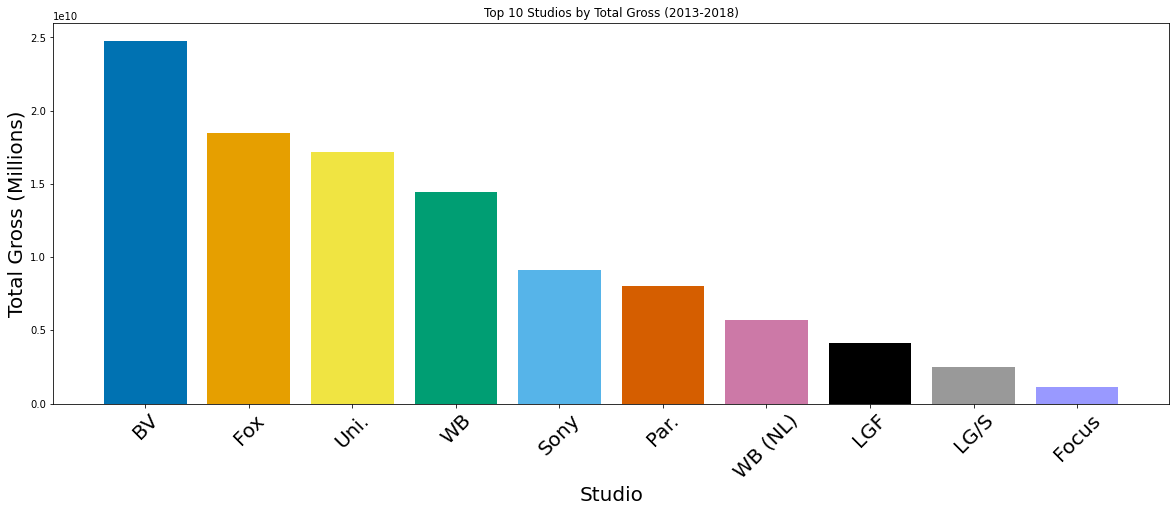

In [46]:
# Determine each studio's total revenue
studio_df['total_gross'] = studio_df['domestic_gross_x'] + studio_df['foreign_gross']
studio_totals = studio_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False)[:10]

# Plot
plt.figure(figsize=(20, 7))
plt.bar(studio_totals.index, studio_totals.values, color=['#0072b2', '#e69f00', '#f0e442', '#009e73', '#56b4e9', '#d55e00', '#cc79a7', '#000000', '#999999', '#9999ff'])
plt.xticks(rotation=45, fontsize=20)
plt.xlabel('Studio', fontsize=20)
plt.ylabel('Total Gross (Millions)', fontsize=20)
plt.title('Top 10 Studios by Total Gross (2013-2018)')

The top 5 studios with respect to gross income are
1. Walt Disney Studios
2. 20th Century Fox
3. Universal Pictures
4. Warner Bros. Pictures
5. Sony Pictures Entertainment (SPE) 

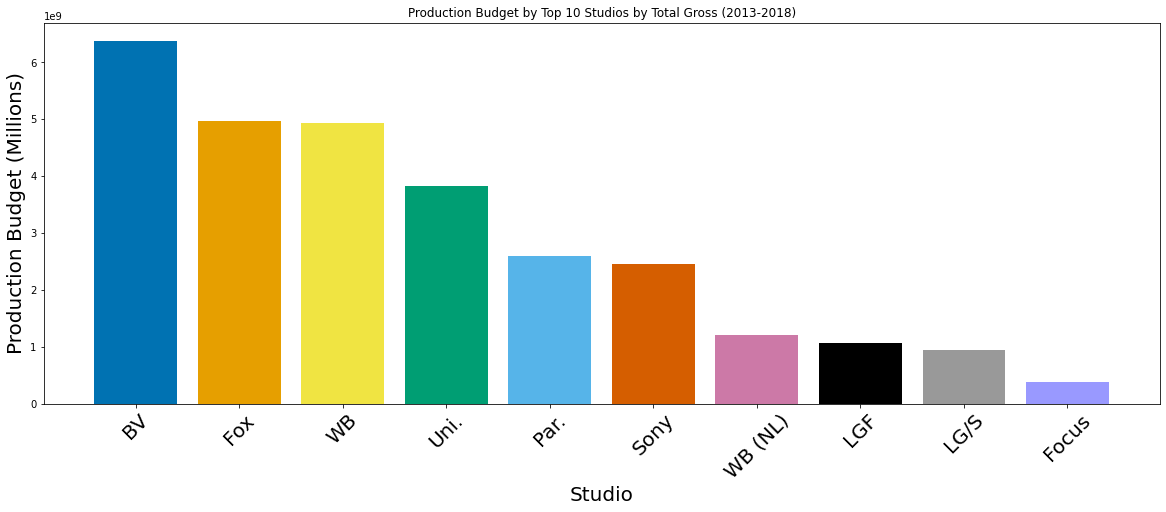

In [47]:
# Filter by top ten studios by total gross
top_ten_studios = studio_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False)[:10]
studio_df_top_ten = studio_df[studio_df['studio'].isin(top_ten_studios.index)]

# Calculate production budget for each studio
production_df = studio_df_top_ten.groupby('studio')['production_budget'].sum().sort_values(ascending=False)

# Create a bar plot of production budget
plt.figure(figsize=(20, 7))
plt.bar(production_df.index, production_df.values, color=['#0072b2', '#e69f00', '#f0e442', '#009e73', '#56b4e9', '#d55e00', '#cc79a7', '#000000', '#999999', '#9999ff'])
plt.xticks(rotation=45, fontsize=20)
plt.xlabel('Studio', fontsize=20)
plt.ylabel('Production Budget (Millions)', fontsize=20)
plt.title('Production Budget by Top 10 Studios by Total Gross (2013-2018)')
plt.show()

Top 5 studios in terms of production budget are:
1. Walt Disney Studios
2. 20th Century Fox
3. Warner Bros. Pictures
4. Universal Pictures
5. Paramount Pictures

In [48]:
#remove unnecessary columns as they are present in both dataframes.
tmbd_mb_df = final_merged_df.drop(['foreign_gross', 'title', 'original_language', 'release_date_y', 'year', 'movie', 'id_y', 'id_x', 'vote_count'], axis=1)
tmbd_mb_df

,genre_ids,original_title,popularity,release_date_x,vote_average,genre_names,studio,domestic_gross_x,production_budget,worldwide_gross,ROI
0,"[28, 12, 878]",Iron Man 3,32.09,2013-05-03,6.90,"[Action, Adventure, Science Fiction]",BV,409000000.00,200000000.00,1215392272.00,507.70
1,"[28, 12, 14]",Thor: The Dark World,31.01,2013-11-08,6.70,"[Action, Adventure, Fantasy]",BV,206400000.00,150000000.00,644602516.00,329.74
2,"[80, 18, 35]",The Wolf of Wall Street,29.52,2013-12-25,7.90,"[Crime, Drama, Comedy]",Par.,116900000.00,100000000.00,389870414.00,289.87
3,"[878, 53, 18]",Gravity,27.84,2013-10-04,7.20,"[Science Fiction, Thriller, Drama]",WB,274100000.00,110000000.00,693698673.00,530.64
4,"[28, 12, 14, 878]",Man of Steel,27.67,2013-06-14,6.50,"[Action, Adventure, Fantasy, Science Fiction]",WB,291000000.00,225000000.00,667999518.00,196.89
...,...,...,...,...,...,...,...,...,...,...,...
441,"[9648, 27, 53]",Insidious: The Last Key,16.02,2018-01-05,6.10,"[Mystery, Horror, Thriller]",Uni.,67700000.00,10000000.00,167885588.00,1578.86
442,"[35, 18, 10749]","Love, Simon",15.61,2018-03-16,8.20,"[Comedy, Drama, Romance]",Fox,40800000.00,10000000.00,65520633.00,555.21
443,"[53, 27]",Truth or Dare,14.35,2018-04-13,6.00,"[Thriller, Horror]",Uni.,41400000.00,3500000.00,95127344.00,2617.92
444,"[10752, 18, 36, 28]",12 Strong,13.18,2018-01-19,5.60,"[War, Drama, History, Action]",WB,45800000.00,35000000.00,71118378.00,103.20


The dataframes "tmdb_movies" and "movie_budgets_filtered_df" have been combined. then took some columns out of the combined dataframe to create a new dataframe called "tmbd_mb_df."

Next lets visualize based on the ROI

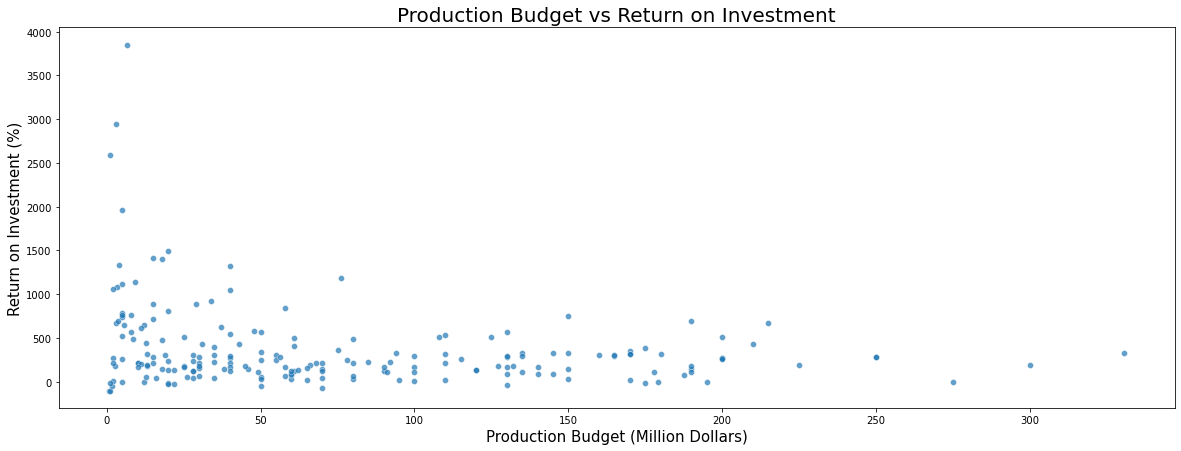

In [49]:
fig, ax = plt.subplots(figsize=(20,7))

# convert production_budget to million dollars
tmbd_mb_df['production_budget_million'] = tmbd_mb_df['production_budget'] / 1000000

sns.scatterplot(x='production_budget_million', y='ROI', data=tmbd_mb_df.head(200), palette='viridis', alpha=0.7)

ax.set_xlabel('Production Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Return on Investment (%)', fontsize=15)
ax.set_title('Production Budget vs Return on Investment', fontsize=20);

The scatter plot study indicates that there is a non-linear relationship between the production budget and the ROI, however there is an inverse link between the two. In particular, there is a negative relationship between the production budget and the return on investment for budgets between zero and one hundred million dollars. Nonetheless, it appears that there is no discernible relationship between the two factors for budgets between $100 and $300 million.

In [50]:
# From the "worldwide_gross" and "RoI" columns, we can examine the Pearson correlation coefficient.
np.corrcoef(tmbd_mb_df['worldwide_gross'], tmbd_mb_df['ROI'])[0,1]

0.11478128790282106


The 'worldwide_gross' and 'ROI' columns have a Pearson correlation coefficient of 0.1148, indicating a weak positive correlation between the two variables. This shows that there may be a slight correlation—though not a very strong one—between larger global grosses and higher returns on investment (RoI) for films. The global gross alone may not have as much of an impact on return on investment as other variables like marketing and production budget. Additionally, the association may be impacted by outliers in the dataset, such as incredibly low-budget films with surprisingly high box office receipts.


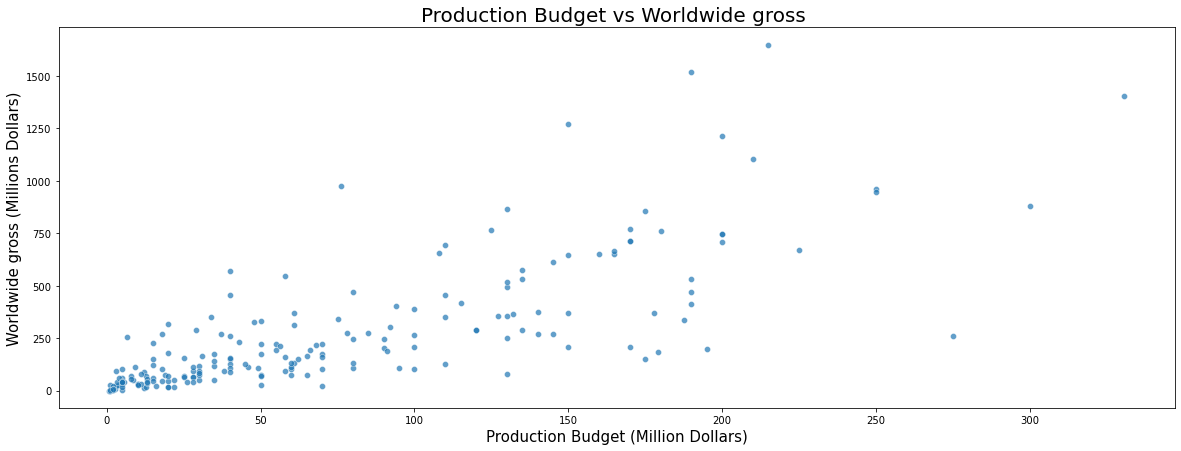

In [51]:
fig, ax = plt.subplots(figsize=(20,7))

# convert production_budget to million dollars
tmbd_mb_df['production_budget_million'] = tmbd_mb_df['production_budget'] / 1000000
tmbd_mb_df['worldwide_gross_milion'] = tmbd_mb_df['worldwide_gross'] / 1000000

sns.scatterplot(x='production_budget_million', y='worldwide_gross_milion', data=tmbd_mb_df.head(200), palette='viridis', alpha=0.7)

ax.set_xlabel('Production Budget (Million Dollars)', fontsize=15)
ax.set_ylabel('Worldwide gross (Millions Dollars)', fontsize=15)
ax.set_title('Production Budget vs Worldwide gross ', fontsize=20);

The scatter plot study indicates that when the production budget rises, the global gross tends to rise as well.

In [52]:
# Another option is to examine the Pearson correlation coefficient between the columns labeled "production budget" and "worldwide gross."
np.corrcoef(tmbd_mb_df['production_budget_million'], tmbd_mb_df['worldwide_gross_milion'])[0,1]

0.7468227585449486

The 'production_budget_million' and 'worldwide_gross_million' columns have a 0.7468 Pearson correlation value, indicating a strong positive relationship between the two variables. This implies that a film's global gross tends to increase in tandem with an increase in the production expenditure. Although it does not always imply causation, the strength of the correlation shows that this link is very stable throughout the sample. The relationship between the worldwide gross and the production budget may also depend on other aspects, such the movie's marketing or quality.

I will now check how the release month affects profitability of the titles.

In [53]:
#onvert the 'release_date_x' column to datetime format
tmbd_mb_df['release_date_x'] = pd.to_datetime(tmbd_mb_df['release_date_x'])

In [54]:
# Add a new column to the table with the release month of each movie.
release_time_df = tmbd_mb_df.copy()

release_time_df['release_month'] = release_time_df["release_date_x"].dt.strftime('%B').astype(str)

release_time_df.head() # check the updated 'release_time_df' DataFrame

,genre_ids,original_title,popularity,release_date_x,vote_average,genre_names,studio,domestic_gross_x,production_budget,worldwide_gross,ROI,production_budget_million,worldwide_gross_milion,release_month
0,"[28, 12, 878]",Iron Man 3,32.09,2013-05-03,6.90,"[Action, Adventure, Science Fiction]",BV,409000000.00,200000000.00,1215392272.00,507.70,200.00,1215.39,May
1,"[28, 12, 14]",Thor: The Dark World,31.01,2013-11-08,6.70,"[Action, Adventure, Fantasy]",BV,206400000.00,150000000.00,644602516.00,329.74,150.00,644.60,November
2,"[80, 18, 35]",The Wolf of Wall Street,29.52,2013-12-25,7.90,"[Crime, Drama, Comedy]",Par.,116900000.00,100000000.00,389870414.00,289.87,100.00,389.87,December
3,"[878, 53, 18]",Gravity,27.84,2013-10-04,7.20,"[Science Fiction, Thriller, Drama]",WB,274100000.00,110000000.00,693698673.00,530.64,110.00,693.70,October
4,"[28, 12, 14, 878]",Man of Steel,27.67,2013-06-14,6.50,"[Action, Adventure, Fantasy, Science Fiction]",WB,291000000.00,225000000.00,667999518.00,196.89,225.00,668.00,June


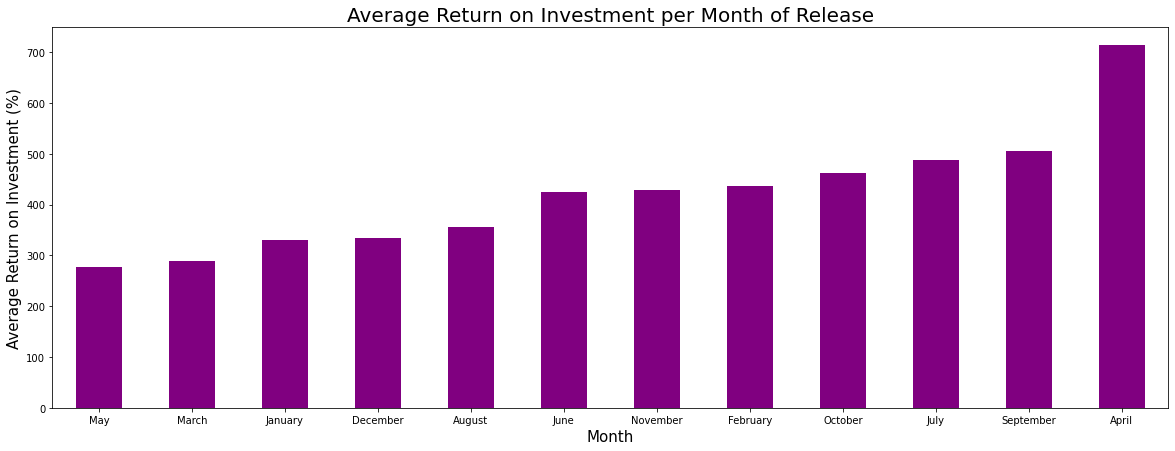

In [55]:
# plot a graph that shows average return on investment (RoI) by month
fig, ax = plt.subplots(figsize=(20,7))
release_time_df.groupby('release_month')['ROI'].mean().sort_values().plot(kind='bar', color='purple')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=20);

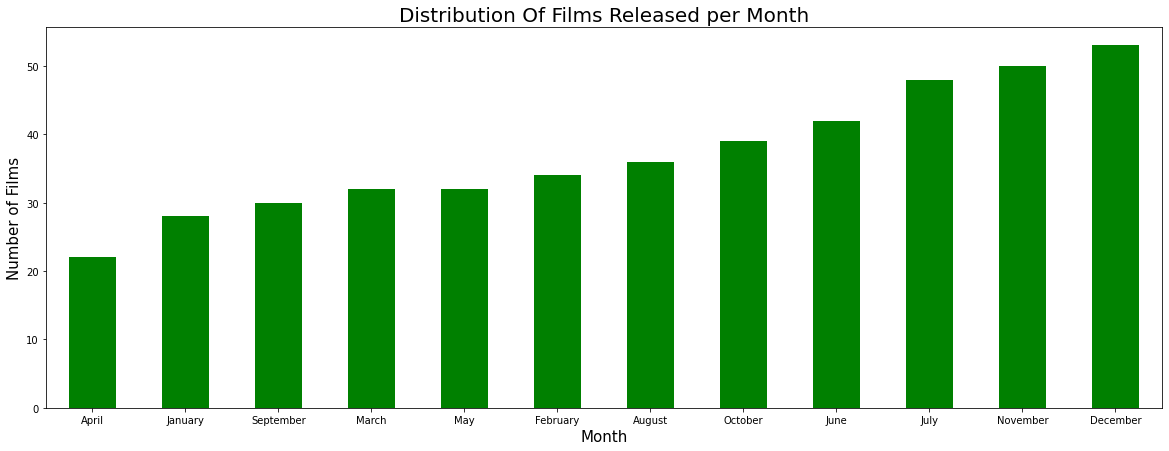

In [56]:
# plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time_df.groupby('release_month')['original_title'].count().sort_values().plot(kind='bar', color='green')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Films Released per Month', fontsize=20);

The biggest return on investment was shown in movies released in April, followed by September and July. In contrast, when it comes to the quantity of movies released in those months, April and September come in last. They have fewer films classified under them, which explains why they offer a larger return on investment. Due to their comparatively high return on investment, movies released in July seem to be a good choice for release.

To find out which genres are more popular, let's take a look at genre popularity.

In [57]:
# Create an empty DataFrame with the desired columns
genre_popl = pd.DataFrame(columns=['popularity', 'title', 'vote_average', 'genre', 'ROI'])

# Iterate through each row of the TMBD+MovieBudgets dataset
for i in range(len(tmbd_mb_df)):
    # Extract the list of genre IDs for each movie
    ids = tmbd_mb_df.iloc[i]['genre_ids']
    
    # Iterate through each genre ID for the current movie
    for j in range(len(ids)):
        # Extract the relevant information for the current movie and genre
        popularity = tmbd_mb_df.iloc[i]['popularity']
        title = tmbd_mb_df.iloc[i]['original_title']
        avg = tmbd_mb_df.iloc[i]['vote_average']
        genre = int(ids[j])
        budget = tmbd_mb_df.iloc[i]['production_budget']
        revenue = tmbd_mb_df.iloc[i]['worldwide_gross']
        
        # Calculate the ROI for the current movie and genre
        if budget != 0:
            roi = ((revenue - budget) / budget) * 100
        else:
            roi = 0
        
        # Append a row to the genre_popl DataFrame with the information for the current movie and genre
        row = {
            'popularity': popularity,
            'title': title,
            'vote_average': avg,
            'genre': genre,
            'ROI': roi
        }
        genre_popl = genre_popl.append(row, ignore_index=True) 

The list of genre IDs for every movie in the TMBD+MovieBudgets dataset should be extracted by this code by iterating through each row. Next, iterating through each genre ID for the current film, it collects pertinent data about the film and genre, computes the film's return on investment (ROI), and appends a row containing the data about the film and genre to the genre_popl DataFrame. One row with the popularity, title, vote average, genre ID, and ROI for each movie-genre combination should appear in the final DataFrame.

In [58]:
genre_popl

,popularity,title,vote_average,genre,ROI
0,32.09,Iron Man 3,6.90,28,507.70
1,32.09,Iron Man 3,6.90,12,507.70
2,32.09,Iron Man 3,6.90,878,507.70
3,31.01,Thor: The Dark World,6.70,28,329.74
4,31.01,Thor: The Dark World,6.70,12,329.74
...,...,...,...,...,...
1239,13.18,12 Strong,5.60,28,103.20
1240,12.53,A Wrinkle in Time,5.00,12,29.52
1241,12.53,A Wrinkle in Time,5.00,878,29.52
1242,12.53,A Wrinkle in Time,5.00,10751,29.52


In [59]:
# merge the genre_popl with the genre_df
genre_popl_merged = genre_popl.merge(genre_df, left_on="genre", right_on="id")
genre_popl_merged

,popularity,title,vote_average,genre_x,ROI,id,genre_y
0,32.09,Iron Man 3,6.90,28,507.70,28,Action
1,31.01,Thor: The Dark World,6.70,28,329.74,28,Action
2,27.67,Man of Steel,6.50,28,196.89,28,Action
3,25.05,47 Ronin,6.00,28,-13.30,28,Action
4,21.38,R.I.P.D.,5.60,28,-39.17,28,Action
...,...,...,...,...,...,...,...
1239,11.73,Straight Outta Compton,7.70,10402,622.08,10402,Music
1240,10.81,We Are Your Friends,6.30,10402,407.67,10402,Music
1241,16.29,Trolls,6.60,10402,175.32,10402,Music
1242,14.89,Pitch Perfect 3,6.50,10402,312.75,10402,Music


Columns for popularity, title, vote_average, genre, ROI, and id should be present in the final dataframe genre_popl_merged, where id is the genre ID used in the TMDB API and genre is the actual name of the genre.

In [60]:
# getting value counts for genre column
genre_popl_merged['genre_y'].value_counts()

Drama              183
Action             164
Comedy             134
Adventure          132
Thriller           131
Science Fiction     90
Crime               67
Fantasy             66
Family              52
Horror              51
Romance             42
Animation           40
Mystery             39
History             27
War                 13
Music                8
Western              5
Name: genre_y, dtype: int64

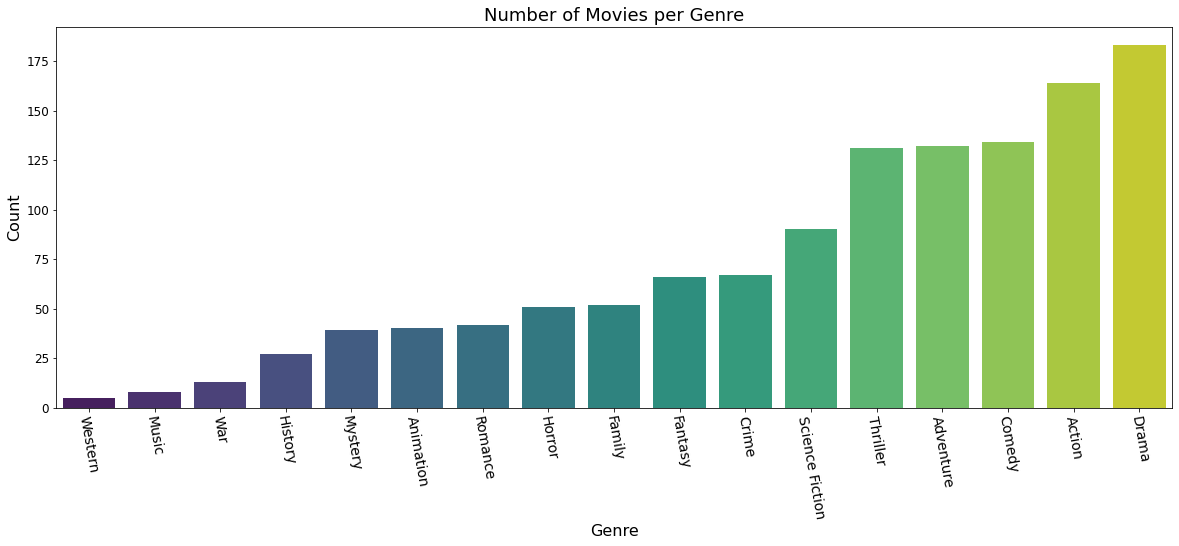

In [61]:
#Plotting the number of movies per genre in dataset
plt.figure(figsize=(20, 7))

#Sort the genres by ascending count
genre_counts_sorted = genre_popl_merged['genre_y'].value_counts().sort_values()
sns.countplot(x='genre_y', data=genre_popl_merged, palette='viridis',
order=genre_counts_sorted.index)

#Setting title, labels, and tick sizes
plt.title('Number of Movies per Genre', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Genre', fontsize=16)
plt.xticks(fontsize=14, rotation=-80)
plt.yticks(fontsize=12)

#Display the plot
plt.show()

Thriller, Adventure, Comedy, Drama, and Action were the genres with the most produced films

In [62]:
#sort movies with highest mean popularity
top_popularity = genre_popl.groupby("genre").mean().sort_values(by="popularity", ascending=False).reset_index()
top_popularity

,genre,popularity,vote_average,ROI
0,12,22.96,6.60,267.76
1,28,22.65,6.51,263.44
2,14,22.61,6.47,225.87
3,878,22.52,6.57,329.80
4,10752,21.46,7.04,339.15
5,10402,18.62,7.20,722.28
6,53,18.18,6.47,562.02
7,16,17.76,6.75,404.61
8,10751,17.75,6.70,353.96
9,9648,16.95,6.58,671.17


This should provide you with a dataframe that is sorted in descending order by the mean popularity of each genre.

In [63]:
most_popular = top_popularity.merge(genre_df, left_on="genre", right_on="id")
most_popular = most_popular.drop(['genre_x', 'id','vote_average'], axis=1)
most_popular 

,popularity,ROI,genre_y
0,22.96,267.76,Adventure
1,22.65,263.44,Action
2,22.61,225.87,Fantasy
3,22.52,329.80,Science Fiction
4,21.46,339.15,War
5,18.62,722.28,Music
6,18.18,562.02,Thriller
7,17.76,404.61,Animation
8,17.75,353.96,Family
9,16.95,671.17,Mystery


The average popularity and ROI for each genre are included in the most_popular dataframe, which is arranged in descending order of popularity. The names of each genre are also included.

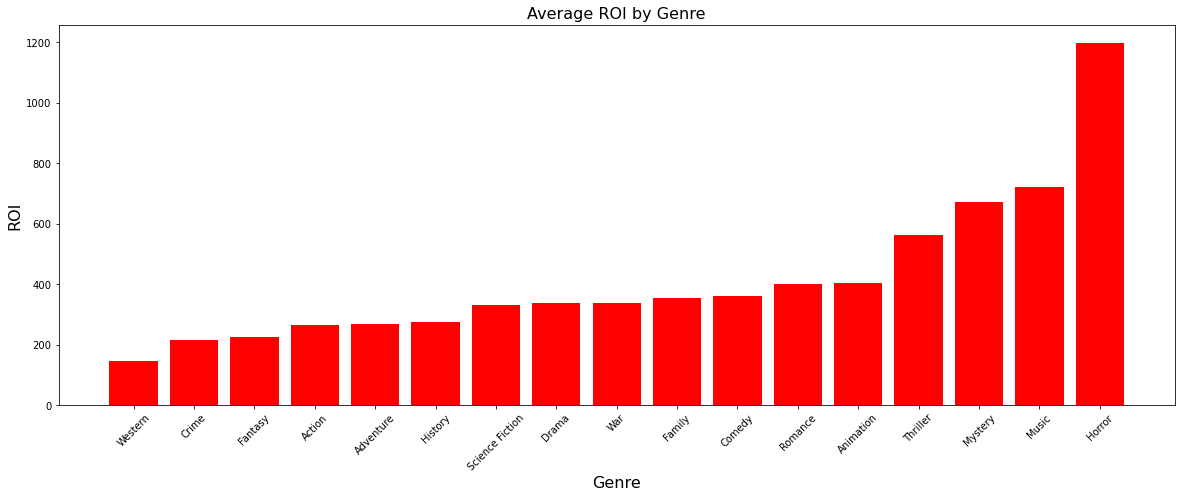

In [64]:
#create a figure and axis object
fig, ax = plt.subplots(figsize=(20,7))

#set the x-axis and y-axis labels
ax.set_xlabel('Genre', fontsize=16)
ax.set_ylabel('ROI', fontsize=16)

#create the bar chart and sort by ascending ROI
most_popular_sorted = most_popular.sort_values('ROI')
ax.bar(most_popular_sorted['genre_y'], most_popular_sorted['ROI'], color='red')

#rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

#add a title to the graph
plt.title('Average ROI by Genre', fontsize=16)

#display the graph
plt.show()

Genres including history, music, thriller, and mystrery have modest production values and a relatively good return on investment. This phenomenon may be explained by the fact that there are fewer films in these genres. ROI was unable to identify the most lucrative genres to investigate as a result. 

In [65]:
#rank movies with highest mean vote_average
top_votes = genre_popl.groupby("genre").mean().sort_values(by="vote_average", ascending=False).reset_index()
top_votes 

,genre,popularity,vote_average,ROI
0,10402,18.62,7.20,722.28
1,36,16.19,7.06,275.35
2,10752,21.46,7.04,339.15
3,18,16.26,6.93,336.94
4,37,16.77,6.80,146.02
5,10749,14.26,6.76,401.53
6,16,17.76,6.75,404.61
7,10751,17.75,6.70,353.96
8,12,22.96,6.60,267.76
9,80,16.78,6.58,216.30


A DataFrame with the average vote rating for each genre arranged in descending order by vote average should be returned by this code.

In [66]:
highly_voted = top_votes.merge(genre_df, left_on="genre", right_on="id")
highly_voted = highly_voted.drop(['genre_x', 'id','popularity'], axis=1)
highly_voted

,vote_average,ROI,genre_y
0,7.20,722.28,Music
1,7.06,275.35,History
2,7.04,339.15,War
3,6.93,336.94,Drama
4,6.80,146.02,Western
5,6.76,401.53,Romance
6,6.75,404.61,Animation
7,6.70,353.96,Family
8,6.60,267.76,Adventure
9,6.58,216.30,Crime


The highly_voted dataframe can provide insight into the genres that viewers tend to rate higher.

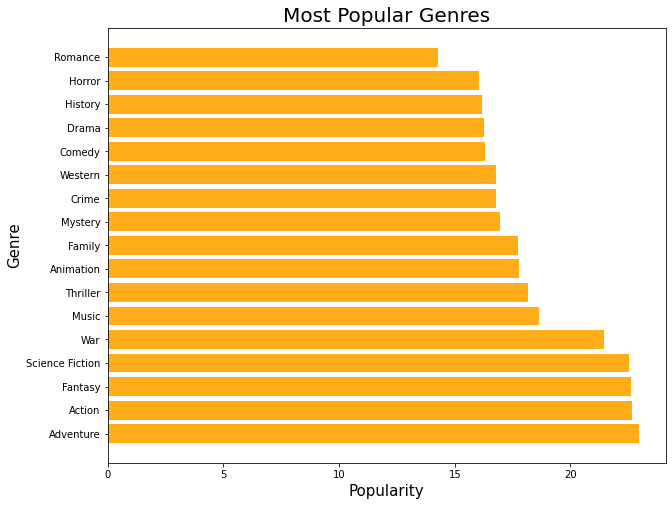

In [67]:
# Create the DataFrame
df = pd.DataFrame({'popularity': [22.96, 22.65, 22.61, 22.52, 21.46, 18.62, 18.18, 17.76, 17.75, 16.95, 16.78, 16.77, 16.30, 16.26, 16.19, 16.06, 14.26],
                   'genre_y': ['Adventure', 'Action', 'Fantasy', 'Science Fiction', 'War', 'Music', 'Thriller', 'Animation', 'Family', 'Mystery', 'Crime', 'Western', 'Comedy', 'Drama', 'History', 'Horror', 'Romance']})

# Sort the DataFrame by popularity
most_popular = df.sort_values(by='popularity', ascending=False)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y=most_popular['genre_y'], width=most_popular['popularity'], color='orange', alpha=0.9)

# Set the x-tick labels
ax.set_xlabel('Popularity', fontsize=15)

# Set the y-tick labels
ax.set_ylabel('Genre', fontsize=15)

# Set the title
ax.set_title('Most Popular Genres', fontsize=20)

# Show the plot
plt.show()


I looked over every film and put them into the appropriate genres. I determined the five most prevalent genres based on my analysis, and they are as follows: 
1. Adventure
2. Action
3. Fantasy
4. Science Fiction
5. War

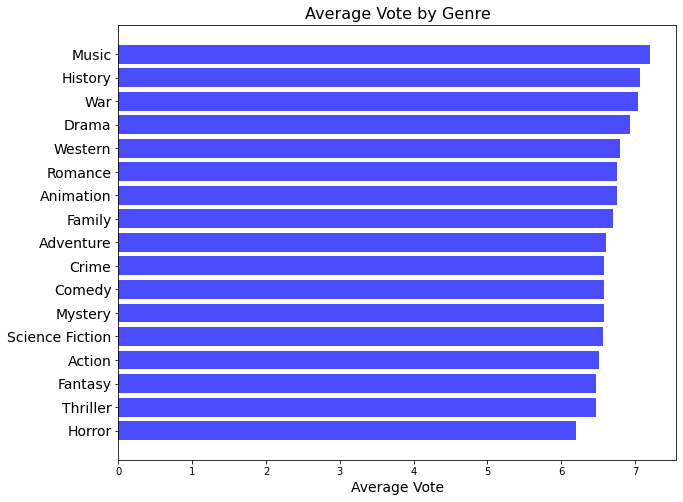

In [68]:
# create the dataframe
data = {'vote_average': [7.20, 7.06, 7.04, 6.93, 6.80, 6.76, 6.75, 6.70, 6.60, 6.58, 6.58, 6.58, 6.57, 6.51, 6.47, 6.47, 6.20],
       'genre_y': ['Music', 'History', 'War', 'Drama', 'Western', 'Romance', 'Animation', 'Family', 'Adventure', 'Crime', 'Comedy', 'Mystery', 'Science Fiction', 'Action', 'Fantasy', 'Thriller', 'Horror']}
df = pd.DataFrame(data)

# sort the dataframe by vote_average in descending order
most_popular = df.sort_values(by='vote_average', ascending=False)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(y=range(len(df)), width=most_popular['vote_average'], color='blue', alpha=0.7)

# set the y-tick labels as the genres
ax.set_yticks(range(len(df)))
ax.set_yticklabels(most_popular['genre_y'], fontsize=14)

# set the x-axis label
ax.set_xlabel('Average Vote', fontsize=14)

# set the title
ax.set_title('Average Vote by Genre', fontsize=16)

# invert the y-axis to display the genres in descending order
ax.invert_yaxis()

# display the plot
plt.show()


I found that the top five categories with the greatest average rating (in terms of stars) are: 
1. Music
2. History 
3. War
4. Drama
5. Western

## Conclusion

This study yields the following recommendations for the genres of films that are performing the best at the box office:   

- Microsoft can purchase its intellectual property rights from any of the big studios, including Walt Disney, Universal Pictures, Warner Brothers, 21st Century Fox, and Sony Pictures Entertainment, as it has no past expertise in the film industry.
- A little positive correlation exists between the production budget and return on investment of a film. 
- The worldwide gross of a film is positively correlated with its production expenditure. 
- July releases have a higher likelihood of being successful.
Action and adventure films are the most popular genres, although horror and music videos are more likely to make a bigger profit.